In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [26]:
img = cv2.imread('dog.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
img[100:-100,100:-100,0]=0
img[100:-100,100:-100,2]=0

In [15]:
img.shape

(394, 518, 3)

In [36]:
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)

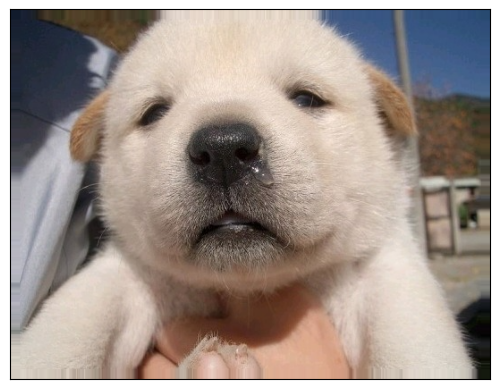

In [37]:
plt.imshow(replicate)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

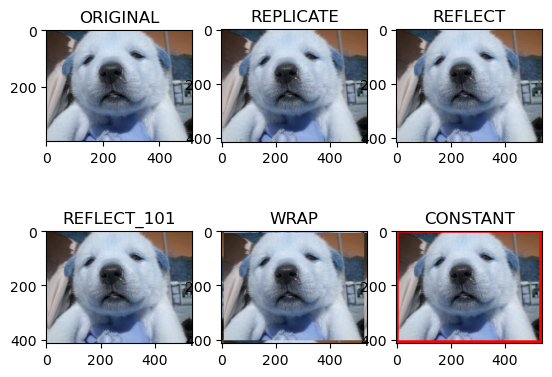

In [38]:
BLUE = [255,0,0]
img1 = cv2.imread('dog.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [39]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

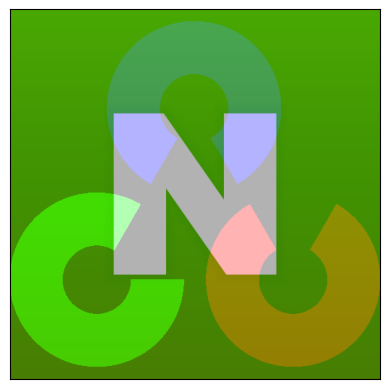

In [40]:
plt.imshow(dst)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [41]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


In [43]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

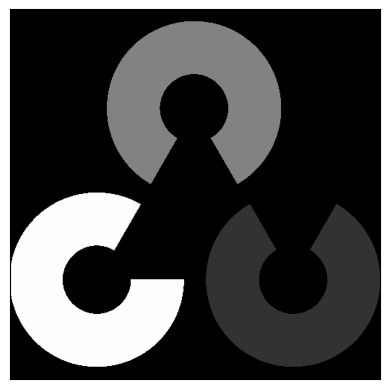

In [44]:
plt.imshow(img2gray,cmap='gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
# Load two images
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape

In [9]:
print(rows,cols,channels)

512 512 3


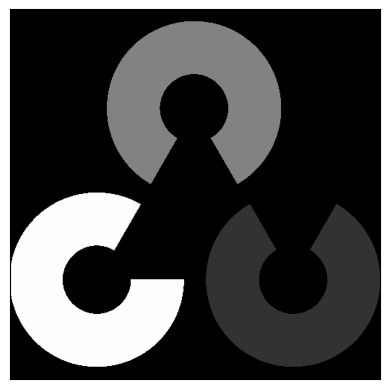

In [11]:
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


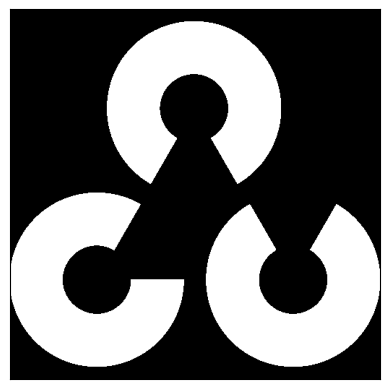

In [15]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


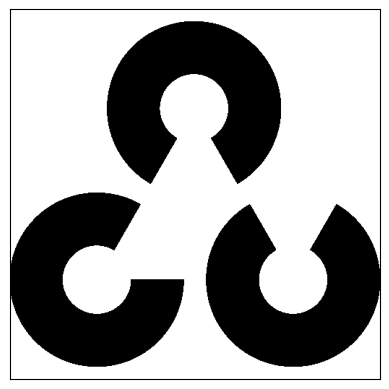

In [19]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


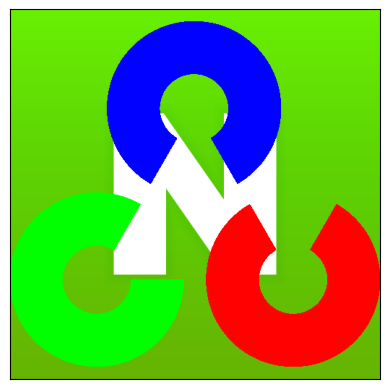

In [20]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1,cmap='gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [18]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
import cv2
import numpy as np
cap = cv2.VideoCapture('tracking1.avi')
while(cap.isOpened):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 